In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import keras
from keras.utils import to_categorical
import ssl

In [2]:

ssl._create_default_https_context = ssl._create_unverified_context


Load Data

In [3]:
(X_train, Y_train), (X_test, Y_test) = keras.datasets.cifar10.load_data()

In [4]:

print("X_train shape:", X_train.shape, "Y_train shape:", Y_train.shape)
print("X_test shape:", X_test.shape, "Y_test shape:", Y_test.shape)

X_train shape: (50000, 32, 32, 3) Y_train shape: (50000, 1)
X_test shape: (10000, 32, 32, 3) Y_test shape: (10000, 1)


In [5]:
#normalize data
X_train, X_test = X_train / 255.0, X_test / 255.0

# print head
print("----------- Train Data -----------")
print(X_train[:1])
print("----------- Test Data -----------")
print(X_test[:1])


----------- Train Data -----------
[[[[0.23137255 0.24313725 0.24705882]
   [0.16862745 0.18039216 0.17647059]
   [0.19607843 0.18823529 0.16862745]
   ...
   [0.61960784 0.51764706 0.42352941]
   [0.59607843 0.49019608 0.4       ]
   [0.58039216 0.48627451 0.40392157]]

  [[0.0627451  0.07843137 0.07843137]
   [0.         0.         0.        ]
   [0.07058824 0.03137255 0.        ]
   ...
   [0.48235294 0.34509804 0.21568627]
   [0.46666667 0.3254902  0.19607843]
   [0.47843137 0.34117647 0.22352941]]

  [[0.09803922 0.09411765 0.08235294]
   [0.0627451  0.02745098 0.        ]
   [0.19215686 0.10588235 0.03137255]
   ...
   [0.4627451  0.32941176 0.19607843]
   [0.47058824 0.32941176 0.19607843]
   [0.42745098 0.28627451 0.16470588]]

  ...

  [[0.81568627 0.66666667 0.37647059]
   [0.78823529 0.6        0.13333333]
   [0.77647059 0.63137255 0.10196078]
   ...
   [0.62745098 0.52156863 0.2745098 ]
   [0.21960784 0.12156863 0.02745098]
   [0.20784314 0.13333333 0.07843137]]

  [[0.7058

Visualize Data

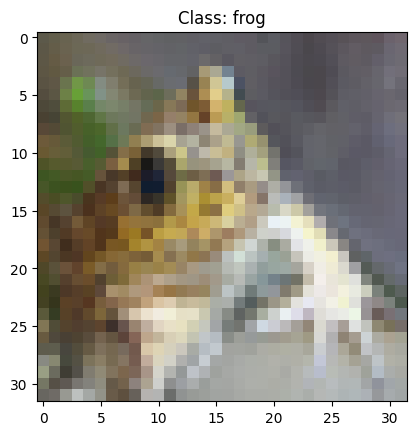

In [6]:

# class of names according to the classes that we have
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
               'dog', 'frog', 'horse', 'ship', 'truck']

# randomly picking an index from the training set
idx = np.random.randint(0, len(X_train))

# Display the image
plt.imshow(X_train[idx])

# retrieve the label using the integer index and get the corresponding class name
# reshape Y_train to be a 1D array of integers
Y_train2 = Y_train.reshape(-1)
label_name = class_names[Y_train2[idx]]

# set the title of the plot with the class name
plt.title(f"Class: {label_name}")

# Show the plot
plt.show()


Model 1

In [7]:
num_classes = 10
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)), # First convolutional layer
    MaxPooling2D((2, 2)), # First pooling layer
    Conv2D(64, (3, 3), activation='relu'), # Second convolutional layer with increased filters
    MaxPooling2D((2, 2)), # Second pooling layer

    Flatten(), # Flatten the 3D output to 1D
    Dense(128, activation='relu'), # Fully connected layer with 128 neurons
    Dense(num_classes, activation='softmax') # Output layer with 'softmax' activation
])

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [8]:
model.compile(
    loss='sparse_categorical_crossentropy',  # Use this loss function for integer labels
    optimizer='adam',
    metrics=['accuracy']
)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 315,722 (1.20 MB)

 Trainable params: 315,722 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.fit(X_train, Y_train, epochs=25,validation_data=(X_test, Y_test))

Epoch 1/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.4106 - loss: 1.6253 - val_accuracy: 0.5916 - val_loss: 1.1614
Epoch 2/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6191 - loss: 1.0836 - val_accuracy: 0.6356 - val_loss: 1.0326
Epoch 3/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6794 - loss: 0.9229 - val_accuracy: 0.6749 - val_loss: 0.9320
Epoch 4/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7272 - loss: 0.7914 - val_accuracy: 0.6917 - val_loss: 0.8943
Epoch 5/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7529 - loss: 0.7073 - val_accuracy: 0.7136 - val_loss: 0.8542
Epoch 6/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7812 - loss: 0.6251 - val_accuracy: 0.7072 - val_loss: 0.8778
Epoch 7/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8094 - loss: 0.5491 - val_accuracy: 0.7075 - val_loss: 0.8907
Epoch 8/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8305 - loss: 0

In [10]:
#evaluate performance of model on test data set 
model.evaluate(X_test, Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6893 - loss: 2.3734


[2.3922667503356934, 0.682699978351593]

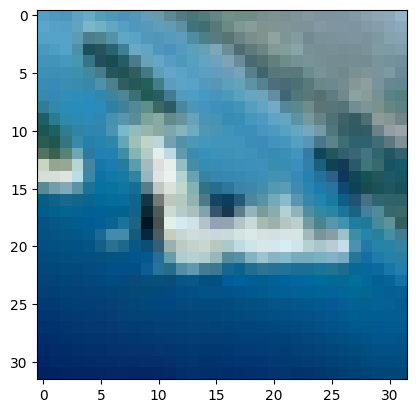

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Our model says it is a: airplane


In [11]:
idx2 = np.random.randint(0, len(X_test))
image_to_test = X_test[idx2]

# Display the image
plt.imshow(image_to_test)
plt.show()

# Predict the label of the image
y_pred = model.predict(image_to_test.reshape(1, 32, 32, 3))

# Get the index of the highest probability from the prediction
predicted_index = np.argmax(y_pred, axis=1)[0]  # Use axis=1 to get the max index per row/sample

# Retrieve the corresponding class name from the class_names list
predicted_class_name = class_names[predicted_index]

print(f"Our model says it is a: {predicted_class_name}")

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.3901 - loss: 1.6880 - val_accuracy: 0.5587 - val_loss: 1.2474
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.5908 - loss: 1.1662 - val_accuracy: 0.6187 - val_loss: 1.0887
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6386 - loss: 1.0354 - val_accuracy: 0.6483 - val_loss: 1.0104
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6736 - loss: 0.9345 - val_accuracy: 0.6635 - val_loss: 0.9759
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6996 - loss: 0.8591 - val_accuracy: 0.6632 - val_loss: 0.9796
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7260 - loss: 0.7883 - val_accuracy: 0.6734 - val_loss: 0.9496
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7435 - loss: 0.7336 - val_accuracy: 0.6828 - val_loss: 0.9314
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7600 - loss: 0.6870 - 

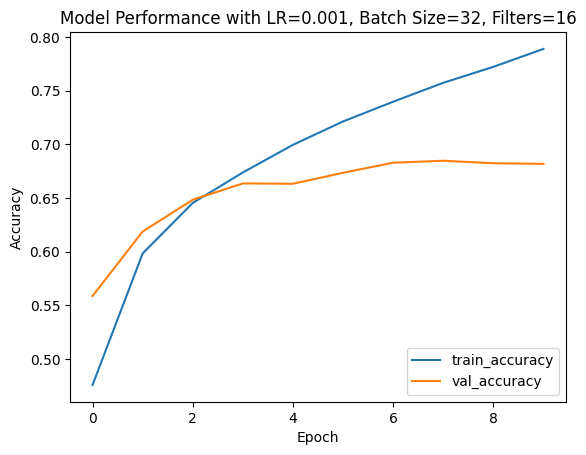

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.3961 - loss: 1.6542 - val_accuracy: 0.5726 - val_loss: 1.2159
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.6102 - loss: 1.1042 - val_accuracy: 0.6419 - val_loss: 1.0209
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.6674 - loss: 0.9496 - val_accuracy: 0.6689 - val_loss: 0.9564
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7035 - loss: 0.8460 - val_accuracy: 0.6860 - val_loss: 0.9143
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7371 - loss: 0.7512 - val_accuracy: 0.6968 - val_loss: 0.8839
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7638 - loss: 0.6793 - val_accuracy: 0.6951 - val_loss: 0.9057
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7858 - loss: 0.6092 - val_accuracy: 0.6969 - val_loss: 0.9008
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8065 - loss: 0

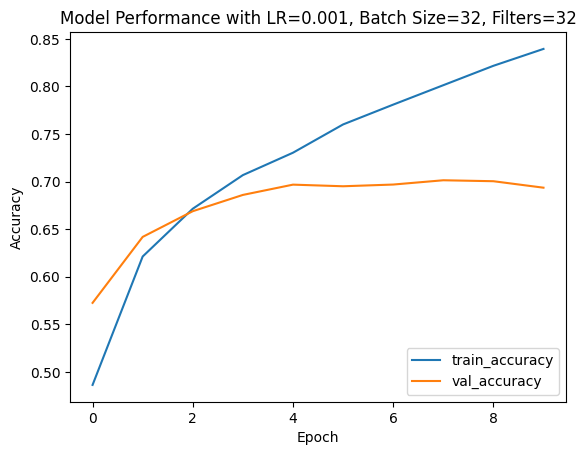

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.3943 - loss: 1.6610 - val_accuracy: 0.5618 - val_loss: 1.2426
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.6167 - loss: 1.0928 - val_accuracy: 0.6561 - val_loss: 0.9890
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.6766 - loss: 0.9204 - val_accuracy: 0.6819 - val_loss: 0.9210
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.7208 - loss: 0.8026 - val_accuracy: 0.6889 - val_loss: 0.8966
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.7501 - loss: 0.7167 - val_accuracy: 0.7051 - val_loss: 0.8644
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.7781 - loss: 0.6333 - val_accuracy: 0.7050 - val_loss: 0.8987
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.8020 - loss: 0.5641 - val_accuracy: 0.7079 - val_loss: 0.8907
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.8253 -

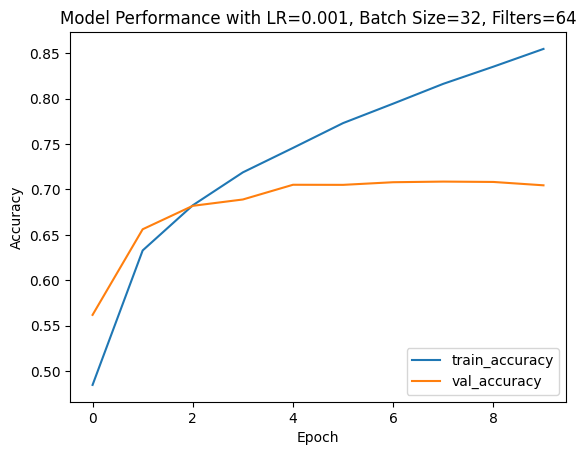

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.3619 - loss: 1.7689 - val_accuracy: 0.5319 - val_loss: 1.3516
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.5568 - loss: 1.2587 - val_accuracy: 0.5993 - val_loss: 1.1402
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6196 - loss: 1.0907 - val_accuracy: 0.6350 - val_loss: 1.0428
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6536 - loss: 0.9916 - val_accuracy: 0.6447 - val_loss: 1.0288
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6807 - loss: 0.9253 - val_accuracy: 0.6653 - val_loss: 0.9718
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7056 - loss: 0.8446 - val_accuracy: 0.6662 - val_loss: 0.9655
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7206 - loss: 0.8021 - val_accuracy: 0.6850 - val_loss: 0.9321
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7400 - loss: 0.7520 - val_accuracy: 0.

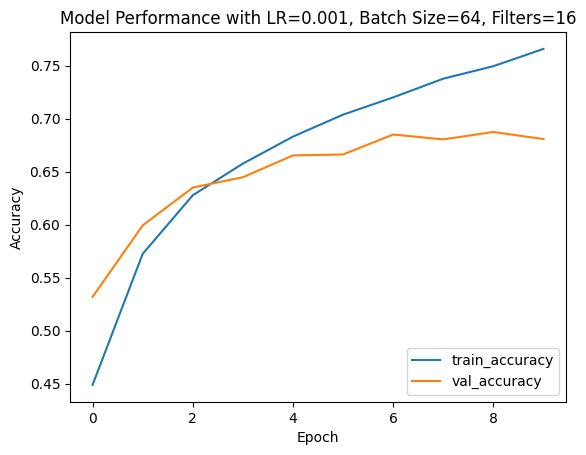

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.3696 - loss: 1.7288 - val_accuracy: 0.5292 - val_loss: 1.2999
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.5924 - loss: 1.1634 - val_accuracy: 0.6237 - val_loss: 1.0858
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.6456 - loss: 1.0155 - val_accuracy: 0.6492 - val_loss: 1.0167
Epoch 4/10
338/782 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.6822 - loss: 0.9119

KeyboardInterrupt: 

In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt
hyperparameters = {
    "learning_rate": [0.001, 0.01, 0.1],
    "batch_size": [32, 64, 128],
    "num_filters": [16, 32, 64],
}

# Iterate over all combinations of hyperparameters
for lr in hyperparameters["learning_rate"]:
    for batch_size in hyperparameters["batch_size"]:
        for num_filters in hyperparameters["num_filters"]:
            # Build the model with the current hyperparameters
            model = Sequential([
                Conv2D(num_filters, (3, 3), activation='relu', input_shape=(32, 32, 3)),
                MaxPooling2D((2, 2)),
                Conv2D(num_filters*2, (3, 3), activation='relu'), 
                MaxPooling2D((2, 2)),
                Flatten(),
                Dense(128, activation='relu'), 
                Dense(10)
            ])
            model.compile(
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
                metrics=['accuracy']
            )
            
            optimizer=tf.keras.optimizers.Adam(learning_rate=lr)
            
            # Train the model
            history = model.fit(X_train, Y_train, epochs=10, batch_size=batch_size, validation_data=(X_test, Y_test))
            # Plot the performance (accuracy) of the model
            plt.plot(history.history['accuracy'], label='train_accuracy')
            plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
            plt.xlabel('Epoch')
            plt.ylabel('Accuracy')
            plt.legend(loc='lower right')
            plt.title(f'Model Performance with LR={lr}, Batch Size={batch_size}, Filters={num_filters}')
            plt.show()



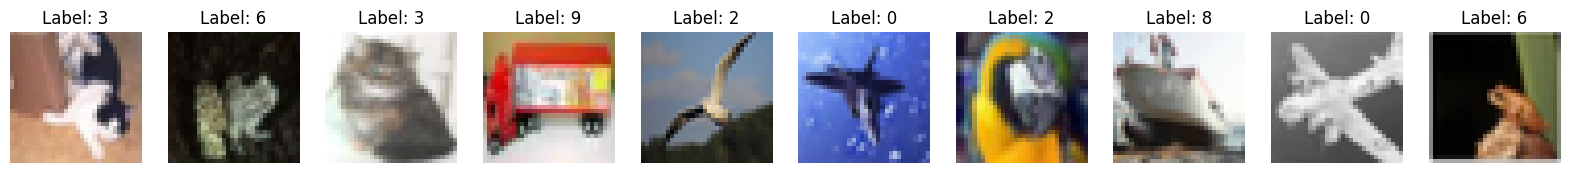

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


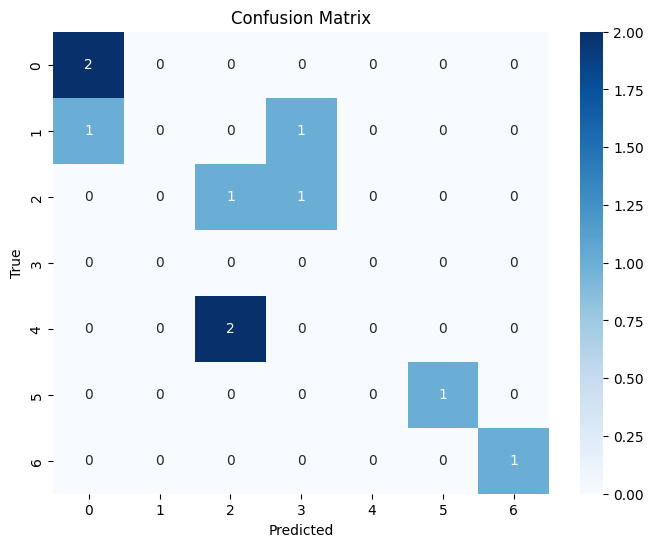

In [14]:
# Cell for importing necessary function and confusion matrix computation in Jupyter
from sklearn.metrics import confusion_matrix
import seaborn as sns

import numpy as np
import random

# Randomly select 10 indices from the test set
random_indices = random.sample(range(len(X_test)), 10)
selected_images = X_test[random_indices]
selected_labels = Y_test[random_indices]

# Show selected images
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 10, figsize=(20, 2))
for i, ax in enumerate(axes):
    ax.imshow(selected_images[i])
    ax.set_title(f'Label: {selected_labels[i][0]}')
    ax.axis('off')
plt.show()

# Obtain predictions from the model
predictions = model.predict(selected_images)
predicted_classes = np.argmax(predictions, axis=1)


from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute the confusion matrix
cm = confusion_matrix(selected_labels, predicted_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()